### Problem Statement

You are a data scientist / AI engineer working on a classification problem to predict the likelihood of pet adoption. You have been provided with a dataset named **`"pet_adoption.csv"`**, which includes various parameters that affect the likelihood of pet adoption. The dataset comprises the following columns:

- `pet_id:` Unique identifier for each pet.
- `pet_type:` Type of pet (e.g., Dog, Cat, Bird, Rabbit).
- `breed:` Specific breed of the pet.
- `age_months:` Age of the pet in months.
- `color:` Color of the pet.
- `size:` Size category of the pet (Small, Medium, Large).
- `weight_kg:` Weight of the pet in kilograms.
- `vaccinated:` Vaccination status of the pet (0 - Not vaccinated, 1 - Vaccinated).
- `health_condition:` Health condition of the pet (0 - Healthy, 1 - Medical condition).
- `timein_shelter_days:` Duration the pet has been in the shelter (days).
- `adoption_fee:` Adoption fee charged for the pet (in dollars).
- `previous_owner:` Whether the pet had a previous owner (0 - No, 1 - Yes).
- `adoption_likelihood:` Likelihood of the pet being adopted (0 - Unlikely, 1 - Likely).

Your task is to use this dataset to build and evaluate machine learning models to predict the likelihood of pet adoption based on the given parameters. You will perform data preprocessing, exploratory data analysis, and model training using a Decision Tree algorithm.

**Dataset credits:** Rabie El Kharoua (https://www.kaggle.com/datasets/rabieelkharoua/predict-pet-adoption-status-dataset)

**Import Necessary Libraries**

In [81]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### Task 1: Data Preparation and Exploration

1. Import the data from the `"pet_adoption_data.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Drop the columns that do not add much value to the analysis `('pet_id')`.
5. Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart.
6. Visualize the distribution of 'age_months' and 'adoption_fee' using histograms.

In [51]:
# Step 1: Import the data from the "pet_adoption.csv" file
df = pd.read_csv("pet_adoption_data.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

(2007, 13)


,pet_id,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [52]:
# Step 4: Drop the columns that do not add much value to the analysis
df = df.drop('pet_id', axis=1)
df.head()

,pet_type,breed,age_months,color,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood
0,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


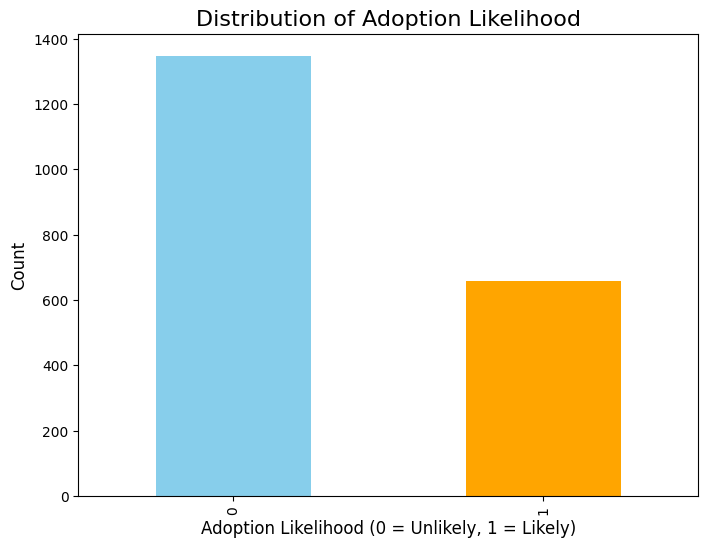

In [53]:
# Step 5: Visualize the distribution of the target variable 'adoption_likelihood' using a bar chart
plt.figure(figsize=(8, 6))
df.adoption_likelihood.value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Adoption Likelihood', fontsize=16)
plt.xlabel('Adoption Likelihood (0 = Unlikely, 1 = Likely)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

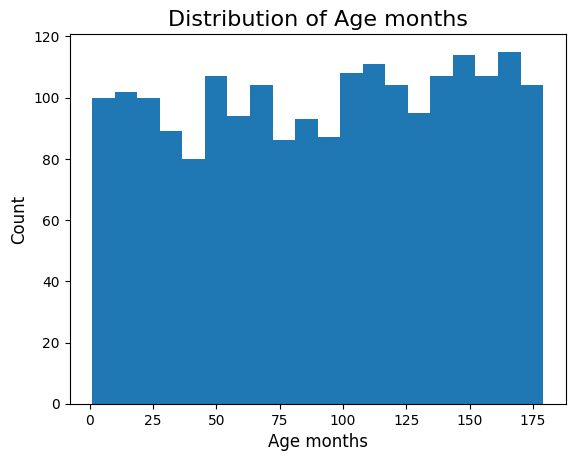

In [54]:
# Step 6: Visualize the distribution of 'age_months' using a histogram
plt.hist(df.age_months, bins=20)
plt.title('Distribution of Age months', fontsize=16)
plt.xlabel('Age months', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

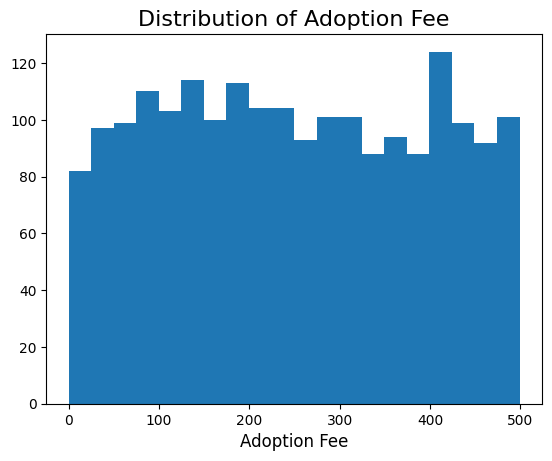

In [55]:
# Step 7: Visualize the distribution of 'adoption_fee' using a histogram
plt.hist(df.adoption_fee, bins=20)
plt.title('Distribution of Adoption Fee', fontsize=16)
plt.xlabel('Adoption Fee', fontsize=12)
plt.show()

### Task 2: Data Encoding and Scaling

1. Encode the categorical variables:
    - `'size'`: Encode by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
    - `'color'`, `'pet_type'`, `'breed'`: Apply one-hot encoding.
<br></br>
3. Scale the numerical features:
    - `'weight_kg'`: MinMax scaling.
    - `'adoption_fee'`: Standard scaling.
<br></br>
4. Display the first few rows of the updated dataset.

In [56]:
# Step 1: Encode the categorical variables

# Encode 'size' by mapping it to numbers (e.g., Small=1, Medium=2, Large=3).
df.size = df['size'].map({'Small': 1, 'Medium': 2, 'Large': 3})

# Encode 'color', 'pet_type' and 'breed' using one-hot encoding
df = pd.get_dummies(df, columns=['color', 'pet_type', 'breed'], drop_first=True)
df.head()

,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Brown,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,3,5.039768,1,0,27,140,0,0,False,...,False,False,False,False,False,True,False,False,False,False
1,73,3,16.086727,0,0,8,235,0,0,False,...,True,False,False,True,False,False,False,False,True,False
2,136,2,2.076286,0,0,85,385,0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,97,1,3.339423,0,0,61,217,1,0,False,...,True,False,False,False,False,True,False,False,False,False
4,123,3,20.498100,0,0,28,14,1,0,False,...,False,False,False,True,False,False,False,False,True,False


In [57]:
# Step 2: Scale the numerical features

# Scale 'weight_kg' using MinMaxScaler
min_max_scaler = MinMaxScaler()
df['weight_kg'] = min_max_scaler.fit_transform(df[['weight_kg']])

# Scale 'adoption_fee' using StandardScaler
std_scaler = StandardScaler()
df['adoption_fee'] = std_scaler.fit_transform(df[['adoption_fee']])

In [58]:
# step3: Display the first few rows of the updated dataset.
df.head()


,age_months,size,weight_kg,vaccinated,health_condition,timein_shelter_days,adoption_fee,previous_owner,adoption_likelihood,color_Brown,...,color_White,pet_type_Cat,pet_type_Dog,pet_type_Rabbit,breed_Labrador,breed_Parakeet,breed_Persian,breed_Poodle,breed_Rabbit,breed_Siamese
0,131,3,0.138783,1,0,27,-0.764025,0,0,False,...,False,False,False,False,False,True,False,False,False,False
1,73,3,0.520009,0,0,8,-0.098998,0,0,False,...,True,False,False,True,False,False,False,False,True,False
2,136,2,0.036514,0,0,85,0.951044,0,0,False,...,False,False,True,False,False,False,False,False,False,False
3,97,1,0.080105,0,0,61,-0.225003,1,0,False,...,True,False,False,False,False,True,False,False,False,False
4,123,3,0.672244,0,0,28,-1.646060,1,0,False,...,False,False,False,True,False,False,False,False,True,False


### Task 3: Model Training Using Decision Tree

1. Select the features and the target variable `('adoption_likelihood')` for modeling.
2. Split the data into training and test sets with a test size of 30%.
3. Initialize and train a Decision Tree Classifier using the training data.
4. Print the model's accuracy score on the test data.
5. Make predictions on the test set.
6. Evaluate the model using a classification report and confusion matrix.
7. Visualize the confusion matrix.
8. Visualize the decision tree structure.

In [61]:
# Step 1: Select the features and the target variable for modeling
X = df.drop('adoption_likelihood', axis=1)
y = df['adoption_likelihood']

# Step 2: Split the data into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Step 3: Initialize and train a Decision Tree Classifier using the training data
model  = DecisionTreeClassifier()
model.fit(X_train, y_train)


# Step 4: Print the model's accuracy score on the test data
print(model.score(X_test, y_test))


0.8490878938640133


In [67]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model using a classification report and confusion matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       403
           1       0.74      0.85      0.79       200

    accuracy                           0.85       603
   macro avg       0.83      0.85      0.84       603
weighted avg       0.86      0.85      0.85       603



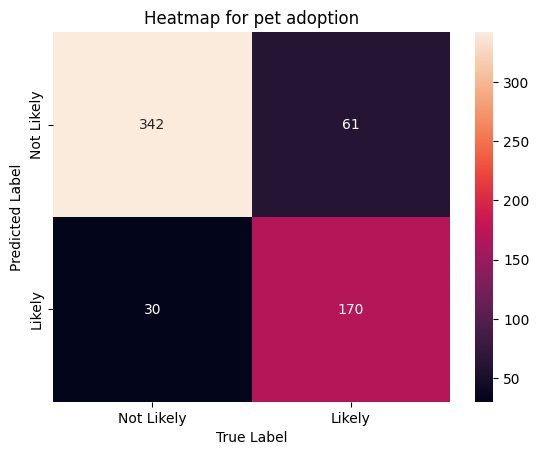

In [76]:
# Step 7: Visualize the confusion matrix
cmf = confusion_matrix(y_test, y_pred)

sns.heatmap(cmf, annot=True, fmt='d', xticklabels=['Not Likely', 'Likely'], yticklabels=['Not Likely', 'Likely'])
plt.title("Heatmap for pet adoption")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

### Task 4: Experiment with Hyperparameters in Decision Tree

1. Train the Decision Tree model with the following parameters:
   - criterion='entropy'
   - max_depth=5
   - min_samples_split=10
   - min_samples_leaf=5

Learn about these parameters here: [DecisionTreeClassifier Parameters](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

--------------------------------------------------------------------------------------------------------------------------------------------------------


2. Print the model's accuracy score on the test data.
3. Evaluate the model using a classification report and confusion matrix.
4. Visualize the confusion matrix.
5. Visualize the decision tree structure.

In [79]:
# Step 1: Train the Decision Tree model with specified hyperparameters
model_custom  = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5)
model_custom.fit(X_train, y_train)


# Step 2: Print the model's accuracy score on the test data
print(model_custom.score(X_test, y_test))

# Step 3: Make predictions on the test set
y_pred_custom = model_custom.predict(X_test)

# Step 4: Evaluate the model using a classification report and confusion matrix
print(classification_report(y_test, y_pred_custom))


0.9054726368159204
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       403
           1       0.90      0.81      0.85       200

    accuracy                           0.91       603
   macro avg       0.90      0.88      0.89       603
weighted avg       0.91      0.91      0.90       603



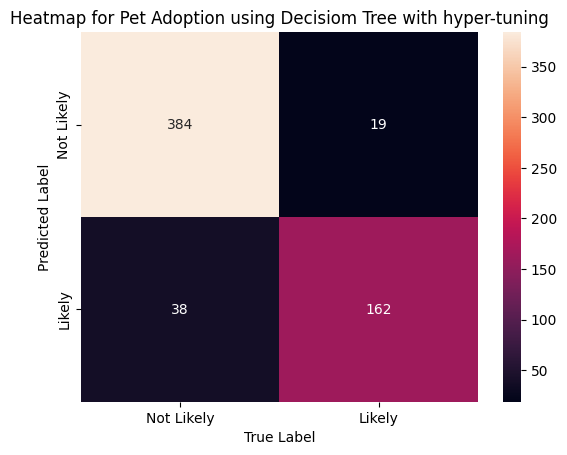

In [80]:
# Step 5: Visualize the confusion matrix
cfm_custom = confusion_matrix(y_test, y_pred_custom)

sns.heatmap(cfm_custom, annot=True, fmt='d', xticklabels=['Not Likely', 'Likely'], yticklabels=['Not Likely', 'Likely'])
plt.title("Heatmap for Pet Adoption using Decisiom Tree with hyper-tuning")
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [83]:
# Step 6: Visualize the decision tree
print(tree.export_text(model_custom, feature_names=list(X.columns)))

|--- vaccinated <= 0.50
|   |--- age_months <= 34.50
|   |   |--- size <= 1.50
|   |   |   |--- age_months <= 21.50
|   |   |   |   |--- class: 0
|   |   |   |--- age_months >  21.50
|   |   |   |   |--- class: 0
|   |   |--- size >  1.50
|   |   |   |--- size <= 2.50
|   |   |   |   |--- age_months <= 23.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age_months >  23.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- size >  2.50
|   |   |   |   |--- adoption_fee <= -0.49
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- adoption_fee >  -0.49
|   |   |   |   |   |--- class: 0
|   |--- age_months >  34.50
|   |   |--- pet_type_Dog <= 0.50
|   |   |   |--- timein_shelter_days <= 34.50
|   |   |   |   |--- class: 0
|   |   |   |--- timein_shelter_days >  34.50
|   |   |   |   |--- color_Brown <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- color_Brown >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- pet_type_Dog >  0.50
|   |   |   |--- size <= 2.5

## Conclusion
* Decision Tree Classifier with default parameters
  * Accuracy: 85%
  * Provides a good baseline with balanced precision and recall for both classes.

* Decision Tree Classifier with custom parameters(criterion='entropy', max_depth=5, min_samples_split=10, min_samples_leaf=5)
  * Accuracy: 91%
  * Improved performance with better precision, recall, and F1-score for the 'Likely' adoption class.

### <i>Accuracy of the model using Decision Tree Classifier has increased with custom parameters.</i>